In [1]:
import sweetviz as sv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import yellowbrick

#import as required

In [2]:
data = pd.read_csv('C:/Users/MaloneA/7. Level 6 Apprenticeship/Professional Practice/top_rated_2000webseries.csv')
df = pd.DataFrame(data)
df.info()
#read in data and name 'df' = look at data info and check DTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   title              2000 non-null   object 
 2   original_title     2000 non-null   object 
 3   overview           1980 non-null   object 
 4   premiere_date      2000 non-null   object 
 5   popularity         2000 non-null   float64
 6   genre              2000 non-null   object 
 7   country_origin     1999 non-null   object 
 8   original_language  2000 non-null   object 
 9   rating             2000 non-null   float64
 10  votes              2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [3]:
df['premiere_date'] = pd.to_datetime(df['premiere_date'], errors='coerce')


In [4]:
df = df.drop_duplicates()
df.shape[0]
#Confirms there are 0 duplicate records

2000

In [5]:
df.sample(10)
#Inspection of some randomly sampled records

,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
1382,1383,Metalocalypse,Metalocalypse,"Part-American, part-Scandinavian death-metal b...",2006-08-06,7.9168,"Animation, Comedy",United States,English,7.594,203
1312,1313,Dead Like Me,Dead Like Me,"When her life comes to an abrupt end, George d...",2003-06-27,6.0370,"Sci-Fi & Fantasy, Drama, Comedy",United States,English,7.642,462
710,711,Ranking of Kings,王様ランキング,"Unable to hear, speak, or wield a sword, Princ...",2021-10-15,7.7229,"Animation, Action & Adventure, Sci-Fi & Fantas...",Japan,Japanese,8.000,284
1993,1994,Bloodline,Bloodline,A dramatic thriller that explores the demons l...,2015-03-20,8.4655,Drama,United States,English,7.098,378
377,378,Beelzebub,べるぜバブ,Violent delinquent Oga encounters a baby one d...,2011-01-09,9.2152,"Animation, Comedy, Drama",Japan,Japanese,8.265,262
690,691,Happiness,해피니스,A new type of deadly virus spread throughout t...,2021-11-05,5.7228,"Drama, Mystery, Sci-Fi & Fantasy",South Korea,Korean,8.000,540
1907,1908,The Graham Norton Show,The Graham Norton Show,Each week celebrity guests join Irish comedian...,2007-02-22,40.9162,"Comedy, Talk",United Kingdom,English,7.179,274
448,449,9-1-1,9-1-1,Explore the high-pressure experiences of polic...,2018-01-03,57.2649,"Drama, Crime, Action & Adventure",United States,English,8.200,2685
1829,1830,The Rain,The Rain,After a brutal virus wipes out most of the pop...,2018-05-04,6.1003,"Sci-Fi & Fantasy, Drama",Denmark,Danish,7.300,1286
161,162,The Last of Us,The Last of Us,Twenty years after modern civilization has bee...,2023-01-15,29.2769,Drama,United States,English,8.465,6592


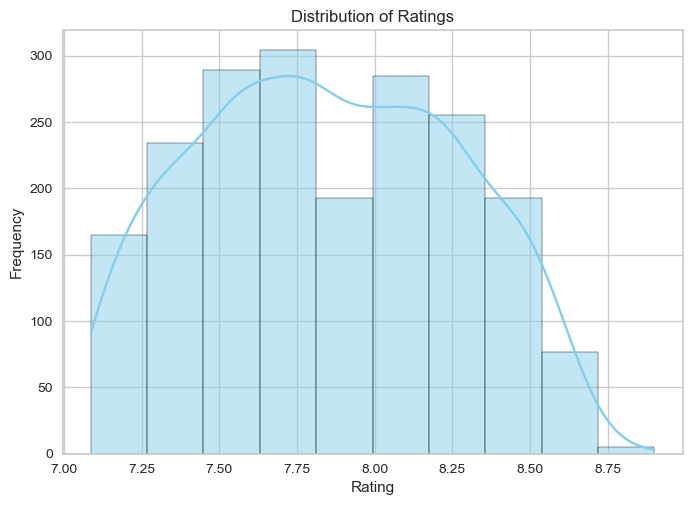

In [6]:
# OR using seaborn for a nicer plot
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [7]:
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
mode_rating = df['rating'].mode()[0]  # mode() returns a Series, take the first value

print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")


Mean: 7.851328499999999
Median: 7.825
Mode: 7.8


In [8]:
# Split genres into a list
df['genre_list'] = df['genre'].str.split(', ')

# Get all unique genres
all_genres = set(g for sublist in df['genre_list'] for g in sublist)

# Create 0/1 columns for each genre
for g in all_genres:
    df[f'genre_{g}'] = df['genre_list'].apply(lambda x: int(g in x))

# Identify incorrectly created multi-genre columns
incorrect_genre_cols = [
    col for col in df.columns 
    if col.startswith('genre_') and ', ' in col
]

# 👀 Inspect them before dropping
print("Incorrectly created genre columns:")
print(incorrect_genre_cols)

# (Optional) View their values
if incorrect_genre_cols:
    display(df[incorrect_genre_cols].head())


Incorrectly created genre columns:
[]


In [9]:
# Drop incorrect genre columns
df = df.drop(columns=incorrect_genre_cols)

# Check final DataFrame structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2000 non-null   int64         
 1   title                     2000 non-null   object        
 2   original_title            2000 non-null   object        
 3   overview                  1980 non-null   object        
 4   premiere_date             2000 non-null   datetime64[ns]
 5   popularity                2000 non-null   float64       
 6   genre                     2000 non-null   object        
 7   country_origin            1999 non-null   object        
 8   original_language         2000 non-null   object        
 9   rating                    2000 non-null   float64       
 10  votes                     2000 non-null   int64         
 11  genre_list                2000 non-null   object        
 12  genre_Comedy        

In [10]:
# Split genres into a list
df['genre_list'] = df['genre'].str.split(', ')

# Get all unique genres
all_genres = set(g for sublist in df['genre_list'] for g in sublist)

# Create 0/1 columns for each genre
for g in all_genres:
    df[f'genre_{g}'] = df['genre_list'].apply(lambda x: int(g in x))

# Drop old multi-genre columns if they exist
incorrect_genre_cols = [col for col in df.columns if col.startswith('genre_') and ', ' in col]
df = df.drop(columns=incorrect_genre_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        2000 non-null   int64         
 1   title                     2000 non-null   object        
 2   original_title            2000 non-null   object        
 3   overview                  1980 non-null   object        
 4   premiere_date             2000 non-null   datetime64[ns]
 5   popularity                2000 non-null   float64       
 6   genre                     2000 non-null   object        
 7   country_origin            1999 non-null   object        
 8   original_language         2000 non-null   object        
 9   rating                    2000 non-null   float64       
 10  votes                     2000 non-null   int64         
 11  genre_list                2000 non-null   object        
 12  genre_Comedy        

In [11]:
df = df.drop(['genre_list'], axis =1)

In [12]:
# Create a binary target column
df['rating_high'] = (df['rating'] > 7.851).astype(int)

# Check the distribution
print(df['rating_high'].value_counts())


rating_high
0    1021
1     979
Name: count, dtype: int64


<Axes: xlabel='rating_high', ylabel='count'>

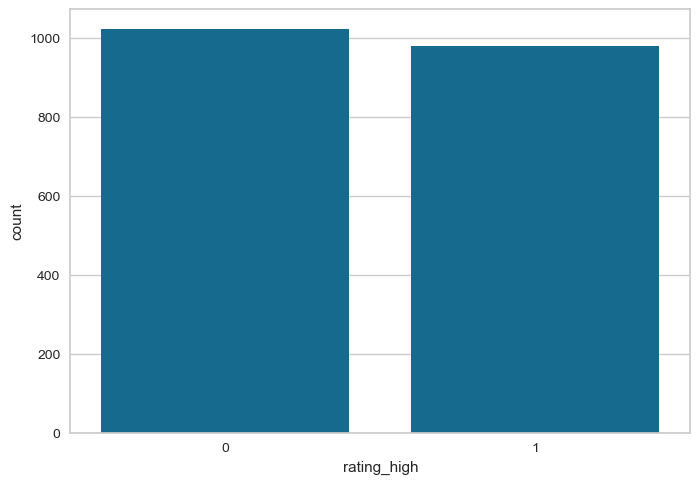

In [13]:
sns.countplot(x='rating_high', data=df)


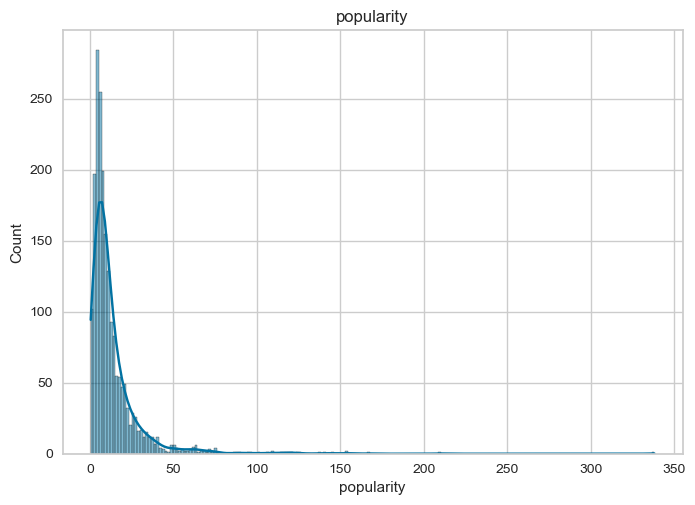

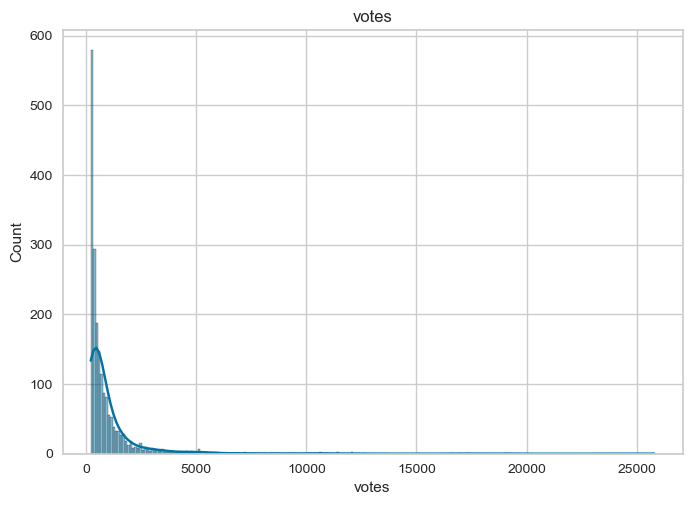

In [14]:
num_cols = ['popularity', 'votes']

df[num_cols].describe()

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [15]:
df.groupby('rating_high')[['popularity', 'votes']].mean()


,popularity,votes
rating_high,,
0,10.326841,647.188051
1,16.926034,1426.848825


<Axes: xlabel='rating_high', ylabel='popularity'>

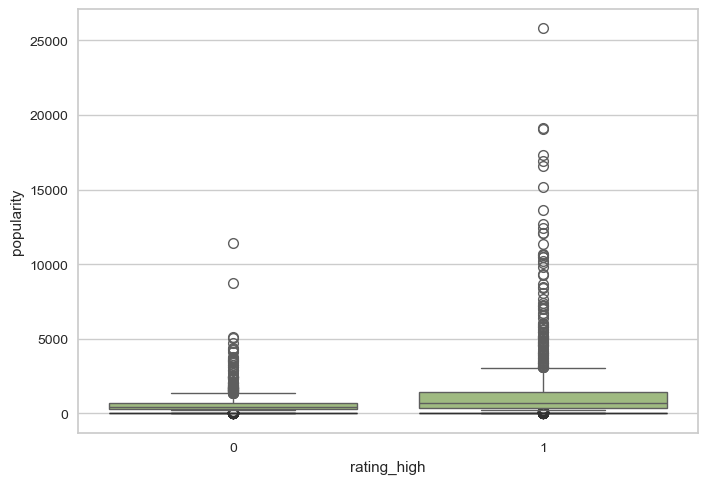

In [16]:
sns.boxplot(x='rating_high', y='popularity', data=df)
sns.boxplot(x='rating_high', y='votes', data=df)


In [17]:
genre_cols = [col for col in df.columns if col.startswith('genre_')]

genre_target_mean = df.groupby('rating_high')[genre_cols].mean().T
genre_target_mean


rating_high,0,1
genre_Comedy,0.314398,0.431052
genre_Talk,0.003918,0.002043
genre_Family,0.104799,0.088866
genre_Romance,0.000979,0.001021
genre_Mystery,0.190989,0.161389
genre_Action & Adventure,0.252693,0.343207
genre_Crime,0.197845,0.155260
genre_War & Politics,0.026445,0.017365
genre_Soap,0.046033,0.022472
genre_News,0.001959,0.000000


<Axes: >

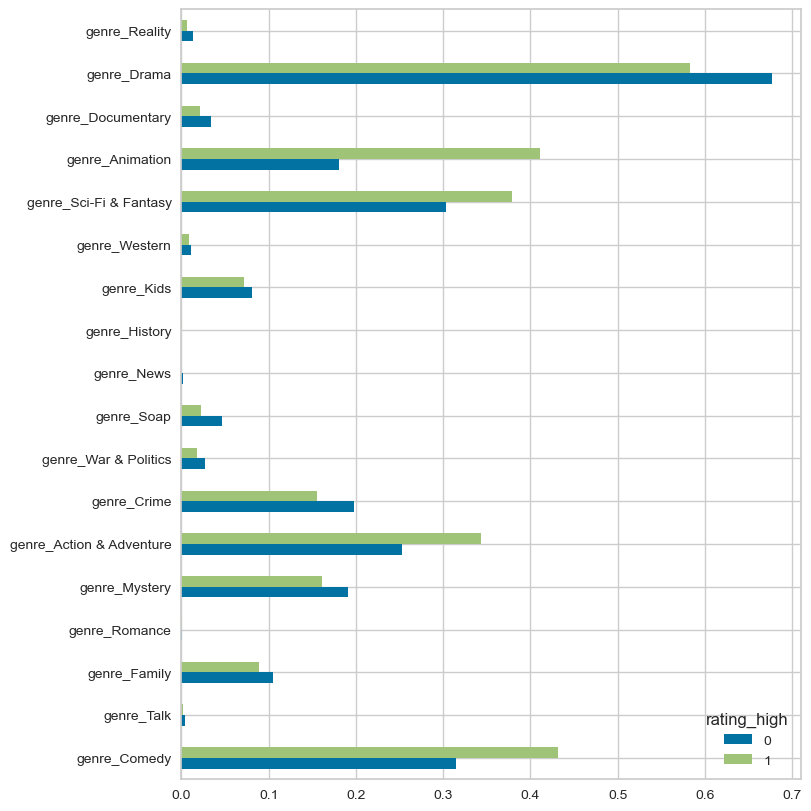

In [18]:
genre_target_mean.plot(kind='barh', figsize=(8,10))


<Axes: >

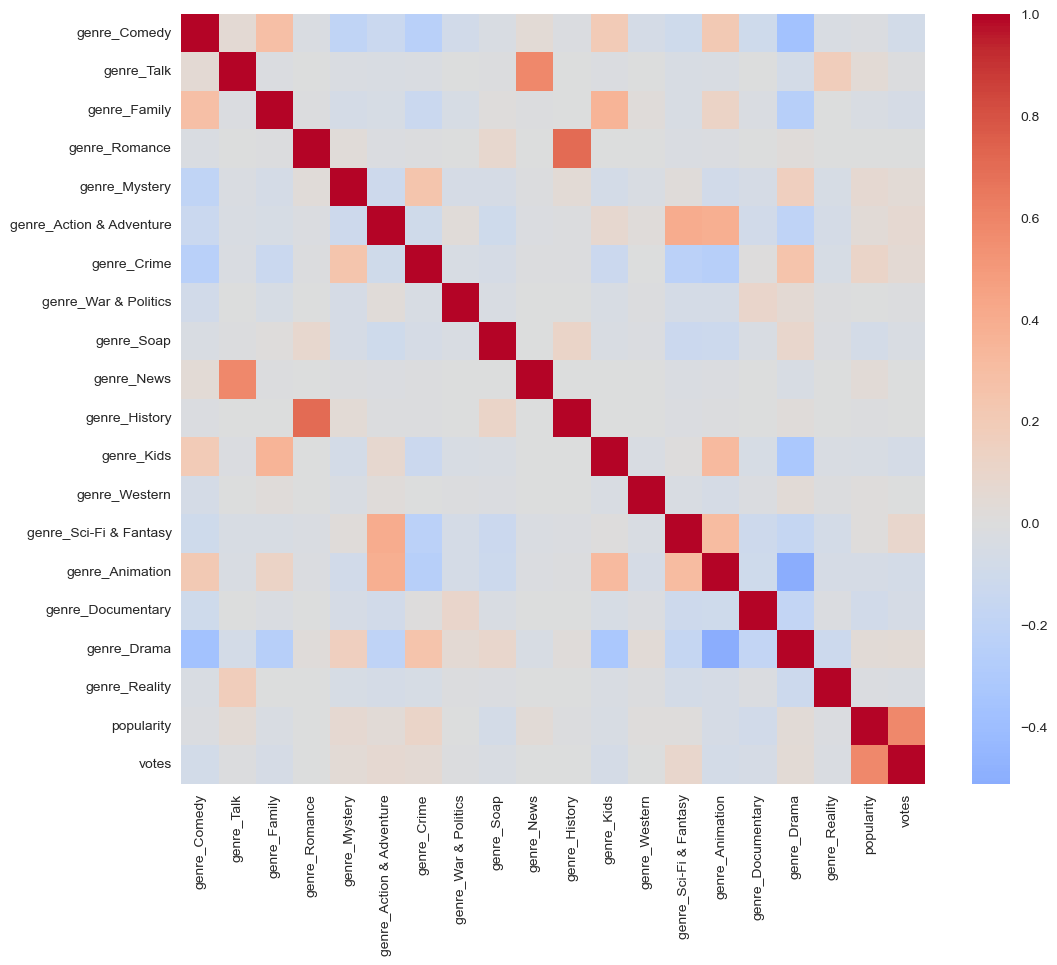

In [19]:
corr = df[genre_cols + ['popularity', 'votes']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)


<Axes: xlabel='log_popularity', ylabel='rating_high'>

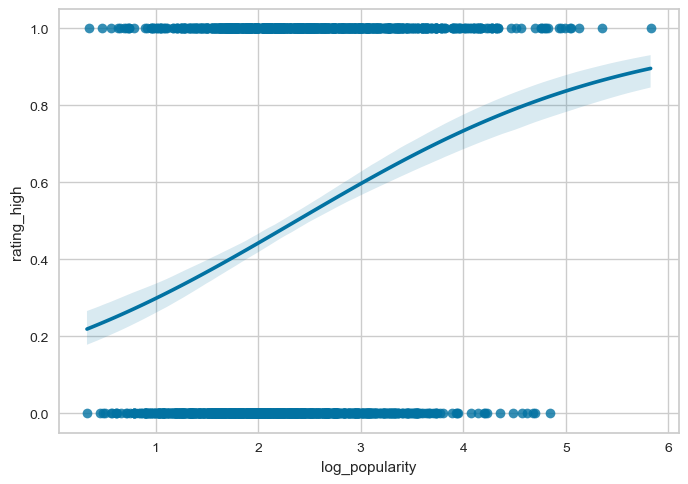

In [20]:
df['log_popularity'] = np.log1p(df['popularity'])

sns.regplot(x='log_popularity', y='rating_high',
            data=df, logistic=True)


<Axes: xlabel='rating_high', ylabel='overview_len'>

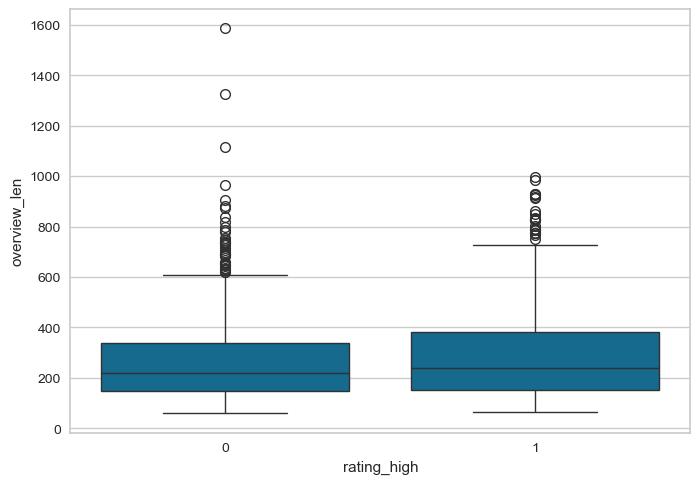

In [21]:
df['overview_len'] = df['overview'].str.len()
sns.boxplot(x='rating_high', y='overview_len', data=df)


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Columns
numeric_features = ['votes', 'popularity']
genre_features = [col for col in df.columns if col.startswith('genre_')]

X = df[numeric_features + genre_features]
y = df['rating_high']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', genre_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000, class_weight = 'balanced'))
])

# Fit
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[157  49]
 [ 75 119]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       206
           1       0.71      0.61      0.66       194

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



In [23]:
# Predicted class labels
y_pred = model.predict(X_test)

# Predicted probabilities (probability of class = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Build results DataFrame
test_results = X_test.copy()
test_results['actual'] = y_test.values
test_results['predicted'] = y_pred
test_results['prob_high'] = y_proba
test_results['correct'] = test_results['actual'] == test_results['predicted']

test_results.head()



,votes,popularity,genre_Comedy,genre_Talk,genre_Family,genre_Romance,genre_Mystery,genre_Action & Adventure,genre_Crime,genre_War & Politics,...,genre_Western,genre_Sci-Fi & Fantasy,genre_Animation,genre_Documentary,genre_Drama,genre_Reality,actual,predicted,prob_high,correct
1748,229,5.0747,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.490642,True
934,600,2.4813,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.348655,False
1033,500,9.6199,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0.518416,False
243,2284,23.1782,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,1,1,0.587325,True
928,908,34.0225,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0.565039,True


In [24]:
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test)

# Build results table
results = pd.DataFrame({
    'actual_class': y_test.values,
    'predicted_class': y_pred,
    'correct': y_test.values == y_pred,
    'actual_rating': df.loc[X_test.index, 'rating']
})

results.head()


,actual_class,predicted_class,correct,actual_rating
1748,0,0,True,7.300
934,1,0,False,7.888
1033,0,1,False,7.816
243,1,1,True,8.400
928,1,1,True,7.900


In [25]:
results.to_csv("logistic_regression_test_results.csv", index=False)
import os
print(os.getcwd())  # shows where the file will be saved
results.to_csv("C:/Users/MaloneA/7. Level 6 Apprenticeship/Professional Practice/logistic_regression_test_results.csv", index=False)


C:\Users\MaloneA\7. Level 6 Apprenticeship\Professional Practice
